# DATA PREPROCESSING
préparer les données ( nettoyer , )
- Encodage
- Normalisation
- Imputation
- Sélection
- extraction

Encodage-normalisation-Création de polynômes --Transformation non linéaire - Discrétisation - Personnalisation  

# La classe transformer
- transform(X) : applique la transformation sur les données X_train, X_test et toutes autres données futures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
X=np.array(['Chat',
           'Chien',
           'Chat',
           "oiseau"])

In [3]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [4]:
transformer.transform(X)

array([0, 1, 0, 2])

In [5]:
# En combinant un transformer et un estimator on crée une chaine appelée pipeline

# ENCODAGE 
LORSQU'ON VEUT FAIRE UN MODÈLE DE machine learning il est essentiel de présenter à la machine des données numériques pour qu'elle les traite
-- CONVERTIR LES VALEURS QUALITATIVES EN VALEURS QUANTITATIVES 

# LABEL ENCODER
Encode chaque classe de la variable y en une valeur numerique (0, n_classe-1)

In [6]:
y=np.array(['Chat',
           'Chien',
           'Chat',
           "oiseau"])
encoder=LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [7]:
# La méthode inverse_transform permet dde décoder les données
encoder.inverse_transform(np.array([0,2,0,2]))

array(['Chat', 'oiseau', 'Chat', 'oiseau'], dtype='<U6')

# ORDINAL ENCODER 
Encode les catégories des variables X en valeurs numériques (0, n_classe-1) ( on parle bien des features ici)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

# OneHot ENCODAGE  
--> Pour résoudre le problème des catégories 0<1<2 qui n'a pas de sens
- LabelBinarizer

In [10]:
from sklearn.preprocessing import LabelBinarizer
y=y=np.array(['Chat',
           'Chien',
           'Chat',
           "oiseau"])
encoder=LabelBinarizer()
encoder.fit_transform(y) # utiliser avec le target y 

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [11]:
# matricce creuse (sparse matrix )
encoder=LabelBinarizer(sparse_output =True)

# One-Hot Encoder
Encode les catégories des variables X en One-Hot

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(X) # utiliser avec les features X

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# LA NORMALISATION
METTRE LES DONNÉES SUR UNE MM ÉCHELLES, normaliser les donnée

- La normalisation MinMax : transforme chaque variable X de telle sorte à être comprise entre 0 et 1  -- MinMaxScaler X_scaled=(X-X_min)/(X_max-X_min)

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [14]:
X=np.array([[70],
           [80],
           [120]])

In [15]:
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

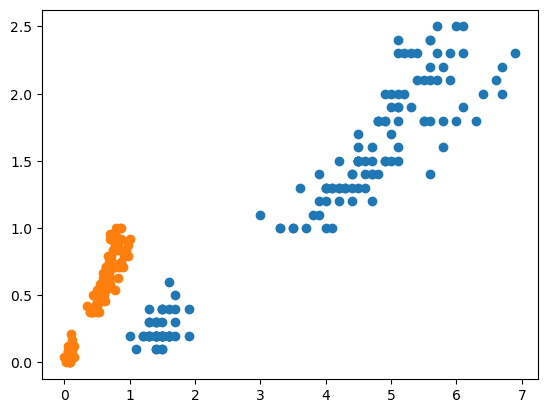

In [16]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data

# pour normaliser les données
X_minmax=MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3])
plt.scatter(X_minmax[:,2],X_minmax[:,3])
plt.show()


# STANDARDISATION
- StandardScaler
  standardise chaque variable X : La moyenne est nulle et lécart type est égale 1 --> X_scaled = (X-)

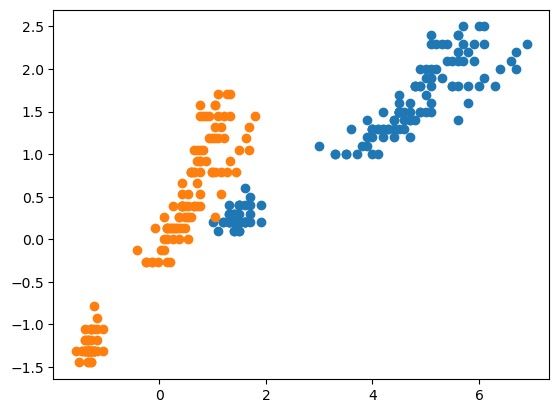

In [17]:
X_stdscl = StandardScaler().fit_transform(X) # sensible aux valeurs aberrantes donc inefficaces en ce cas


plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])

# ROBUST SCALER
- transforme chaque variable X en étant peu sensible aux outliers
  X_scaled = (X- mediane)/IQR avec IQR= le quartile 3 - le 1er quartile (Q_3-Q_1)

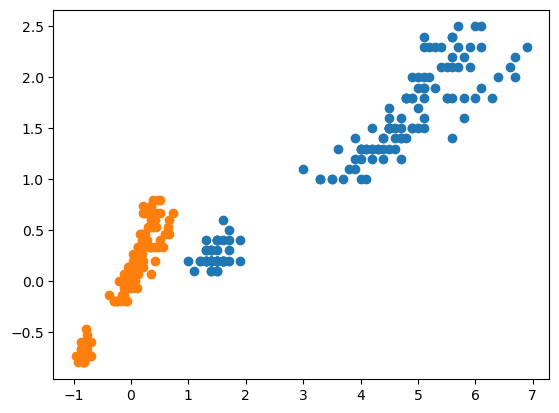

In [18]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

# POLYNOMIAL FEATURES 
 crée de nouvelles variables polynomiales à partir des variables existantes

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [20]:
X= np.array([[1],
            [2],
            [0.5]])

In [21]:
PolynomialFeatures(3).fit_transform(X) # La machine apprend alors un modèle

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

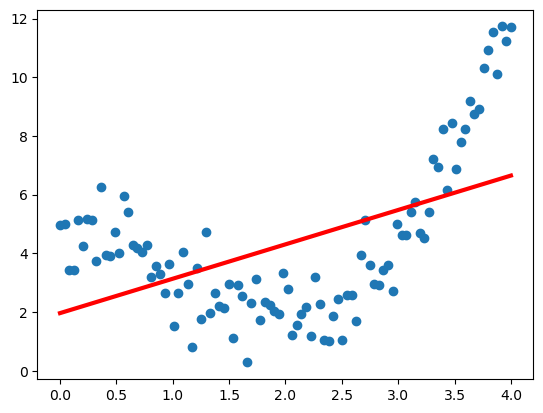

In [22]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

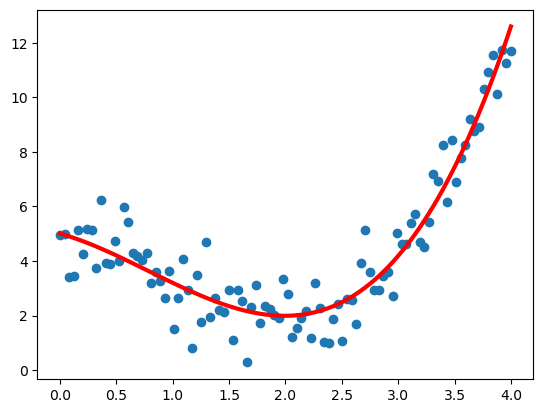

In [23]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

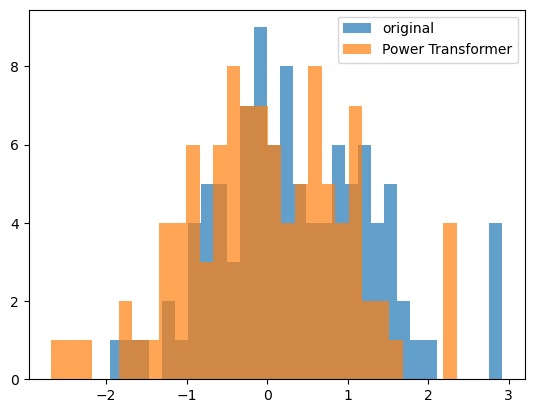

In [24]:
from sklearn.preprocessing import PowerTransformer

np.random.seed(0)
X=np.random.rand(100, 2) + np.random.randn(100,2)

X2= PowerTransformer().fit_transform(X)

plt.hist(X[:,0],bins= 30 , alpha=0.7 , label='original')
plt.hist(X2[:,0],bins= 30 , alpha=0.7 , label='Power Transformer')
plt.legend()
plt.show()

 TRANSFORMATION NON LINEAIRE

 # DISCRÉTISATION
 

In [25]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

X = np.linspace(0, 5,10).reshape((10, 1))
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))  # découper une variable conttinue en plusieurs

# supérieur 3 = 1 et tout ce qui est inférieur à 3 égale à 0

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [26]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# PIPELINE
COMMENT COMBINER LES TRANSFORMER ET LES estimateurs pour créer des modèles vraiment performant

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


# on utilise des données pour construire un transformer (fit_transform()) pour ensuite entrainer un estimateur

#

In [29]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
# Transformer
scaler= StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#Test
X_test_transformed= scaler.transform(X_test)
model.predict(X_test_transformed)



array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [ ]:
# on peut le faire d'une manière plus simple en les regroupant

In [31]:
model = make_pipeline(StandardScaler(), SGDClassifier())  # ici on a utiliser la fonction 
# make_pipeline ; on peut aussi utiliser la classe pipeline

model.fit(X_train, y_train)
model.score(X_test, y_test)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [32]:
from sklearn.model_selection import GridSearchCV # pour optimiser notre pipeline 

In [33]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))


In [34]:
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [35]:
print(grid.best_params_) # pour connaitre nos meilleurs paramètres
print(grid.score(X_test, y_test))

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}
0.9736842105263158


In [36]:
  # VOYOS VOIR CE QU'on aurait obtenu sans faire de preprocessing 


model = SGDClassifier(random_state=0 )
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8421052631578947